<a href="https://colab.research.google.com/github/AleksandrRevuka/HW_Data_Science/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import pandas as pd

data = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", attrs={"class": "wikitable"})

print(data)

[        Unnamed: 0 січень 2021[i] Unnamed: 2 січень 2022[i]
0       Народжених         21 931          ▼         18 062
1         Померлих         57 721          ▼         57 248
2    Природний рух        -35 790          ▼        -39 186
3  Міграційний рух          2 272          ▲          2 282,    1960  1966  1970  1975  1980  1985  1990  1995  1997  2000  2002  2004  \
0   138   185   157   150   153   149   155   150   135   113    68    48   

   2006  2008  2010  
0    38    43    36  ,      Рік Кількість народжень Коефіцієнт народжуваності Коефіцієнт фертильності
0   1860                   —                     ~50,0                       —
1   1896                   —                     ~47,5                       —
2   1906                   —                     ~44,0                       —
3   1913             ~1500,0                     ~40,0                   ~6,00
4   1925             ~1400,0                     ~38,0                     539
5   1940             ~11

Вивести перші рядки таблиці за допомогою методу head

In [247]:
birth_table = pd.DataFrame(data[2])

print(birth_table.head())

    Рік Кількість народжень Коефіцієнт народжуваності Коефіцієнт фертильності
0  1860                   —                     ~50,0                       —
1  1896                   —                     ~47,5                       —
2  1906                   —                     ~44,0                       —
3  1913             ~1500,0                     ~40,0                   ~6,00
4  1925             ~1400,0                     ~38,0                     539


Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [248]:
rows, colums = birth_table.shape

print(f"rows: {rows}\ncolums: {colums}")

rows: 21
colums: 4


Замініть у таблиці значення "—" на значення NaN

In [249]:
import numpy as np


birth_table.replace("—", np.nan, inplace=True)

print(birth_table)

     Рік Кількість народжень Коефіцієнт народжуваності Коефіцієнт фертильності
0   1860                 NaN                     ~50,0                     NaN
1   1896                 NaN                     ~47,5                     NaN
2   1906                 NaN                     ~44,0                     NaN
3   1913             ~1500,0                     ~40,0                   ~6,00
4   1925             ~1400,0                     ~38,0                     539
5   1940             ~1100,0                       273                     NaN
6   1950                8414                       228                     281
7   1955                7901                       200                     NaN
8   1960                8706                       205                     224
9   1965                6905                       153                     NaN
10  1970                7163                       152                     210
11  1975                7381                       1

Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [250]:
birth_table.dtypes

Рік                           int64
Кількість народжень          object
Коефіцієнт народжуваності    object
Коефіцієнт фертильності      object
dtype: object

Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [251]:
birth_table['Кількість народжень'] = pd.to_numeric(birth_table['Кількість народжень'], errors='coerce')
birth_table['Коефіцієнт народжуваності'] = pd.to_numeric(birth_table['Коефіцієнт народжуваності'], errors='coerce')
birth_table['Коефіцієнт фертильності'] = pd.to_numeric(birth_table['Коефіцієнт фертильності'], errors='coerce')

print(birth_table.dtypes)

Рік                            int64
Кількість народжень          float64
Коефіцієнт народжуваності    float64
Коефіцієнт фертильності      float64
dtype: object


Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [229]:
missing_percentages = birth_table.isnull().sum() / len(birth_table) * 100

print("Share missing:")
print(missing_percentages)

Share missing:
Рік                           0.000000
Кількість народжень          14.285714
Коефіцієнт народжуваності     0.000000
Коефіцієнт фертильності      38.095238
dtype: float64


Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [230]:
birth_table.drop([20], inplace=True)

birth_table

,Рік,Кількість народжень,Коефіцієнт народжуваності,Коефіцієнт фертильності
0,1860,NaN,500,NaN
1,1896,NaN,475,NaN
2,1906,NaN,440,NaN
3,1913,15000.0,400,600.0
4,1925,14000.0,380,539.0
5,1940,11000.0,273,NaN
6,1950,8414.0,228,281.0
7,1955,7901.0,200,NaN
8,1960,8706.0,205,224.0
9,1965,6905.0,153,NaN


Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [232]:
birth_table.fillna(birth_table.mean(), inplace=True)

birth_table

,Рік,Кількість народжень,Коефіцієнт народжуваності,Коефіцієнт фертильності
0,1860,7661.647059,500,241.083333
1,1896,7661.647059,475,241.083333
2,1906,7661.647059,440,241.083333
3,1913,15000.000000,400,600.000000
4,1925,14000.000000,380,539.000000
5,1940,11000.000000,273,241.083333
6,1950,8414.000000,228,281.000000
7,1955,7901.000000,200,241.083333
8,1960,8706.000000,205,224.000000
9,1965,6905.000000,153,241.083333


Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [238]:
import pandas as pd

data = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", attrs={"class": "wikitable collapsible collapsed"})
birth_in_regions = data[3]

for col in birth_in_regions.columns[1:]:
    birth_in_regions[col] = pd.to_numeric(birth_in_regions[col], errors='coerce') * 0.1

birth_in_regions.drop([27], inplace=True)

above_average_regions = birth_in_regions[birth_in_regions['2019'] > birth_in_regions['2019'].mean()]
regions_list = above_average_regions['Регіон'].tolist()

print(birth_in_regions, "\n")

print(regions_list)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

У якому регіоні була найвища народжуваність у 2014 році?

In [239]:
region_highest_birth_rate = birth_in_regions.loc[birth_in_regions['2014'].idxmax(), "Регіон"]

print(region_highest_birth_rate)

Рівненська


Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

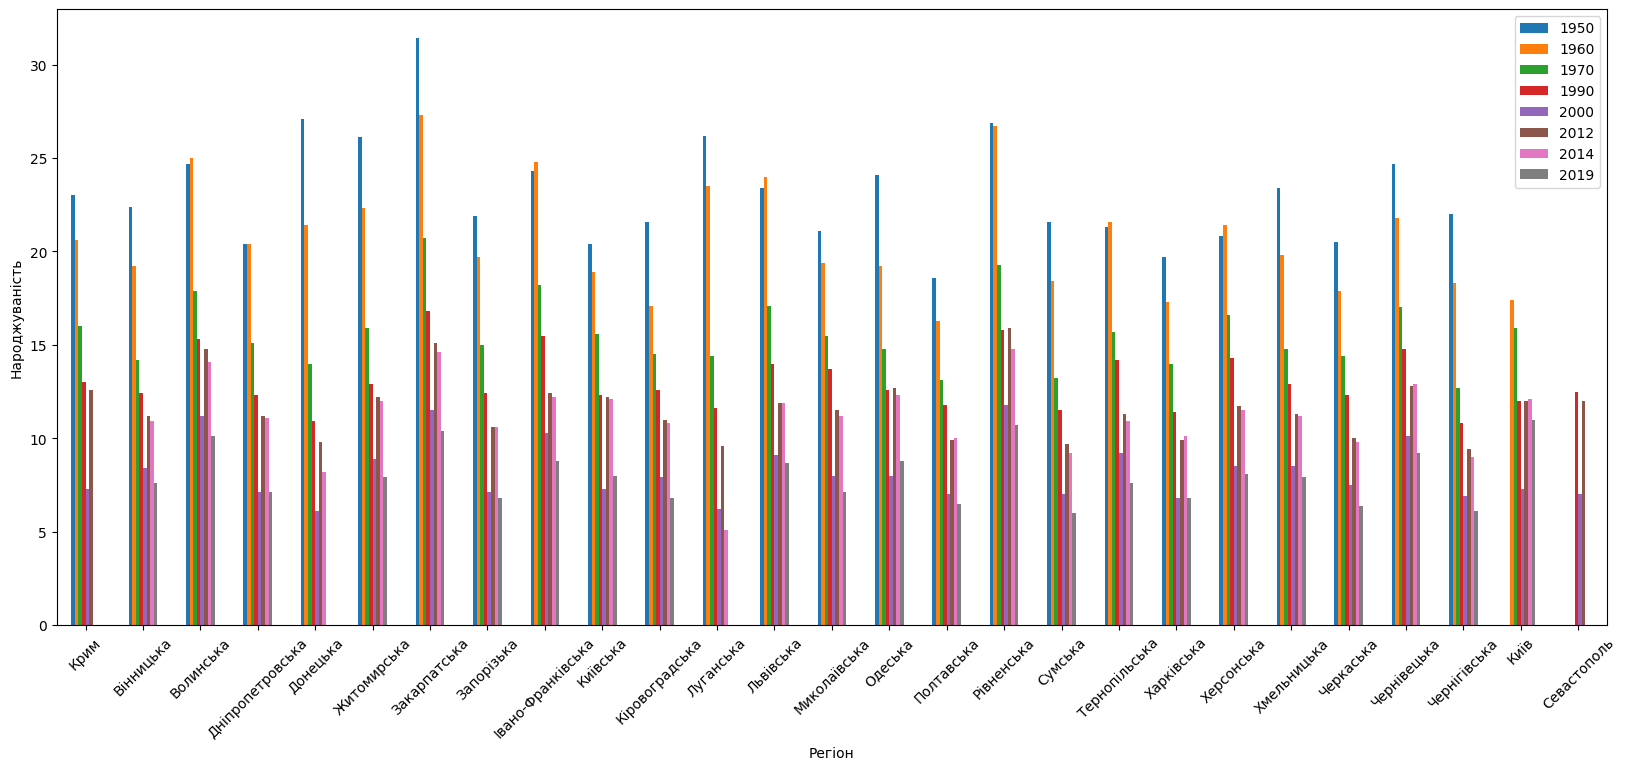

In [240]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 8))

birth_in_regions.set_index("Регіон", inplace=True)
plt.xlabel("Регіон")
plt.ylabel("Народжуваність")

birth_in_regions.plot(kind="bar", ax=ax)

plt.xticks(rotation=45)

plt.show()